# Background Information

**About Company**

Ajiboye and Sons Finance company deals in all home loans and have presence across all urban, semi urban and rural areas. Before a customer can apply for a house loan, the company needs to validate the customer's eligibility status for loan.

**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

These details include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process,
they have given a problem to identify the customers segments, those that are eligible for loan amount so that they can specifically target these customers.
Here they have provided a partial data set.


**Task**

-Data Cleaning

-EDA

-CustomerSegmentation 

-Eligibility Status



# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=12,12
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Train.csv')

# Exploratory Data Analysis

In [3]:
#top 5 of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Summary Statistics
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# To check for the data type of each feature
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#To check the shape of the dataset
data.shape

(614, 13)

In [7]:
#To check for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#To check for percentage of missing value in each column
data.isnull().sum()/len(data)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
#To check the unique values of the non-numeric column
categorical=data.select_dtypes(include='O')

# To get the unique values in the catgorical columns
for col in categorical:
    print(f'{col} contains {categorical[col].nunique()} unique values' )

Loan_ID contains 614 unique values
Gender contains 2 unique values
Married contains 2 unique values
Dependents contains 4 unique values
Education contains 2 unique values
Self_Employed contains 2 unique values
Property_Area contains 3 unique values
Loan_Status contains 2 unique values


In [10]:
#To visualize the first 5 values
categorical.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


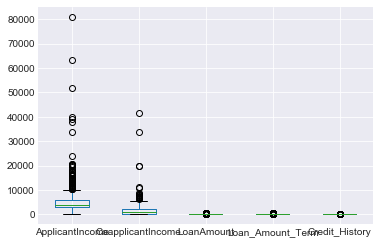

In [11]:
#To check for outlier in the dataset
data.boxplot()

In [12]:
import missingno

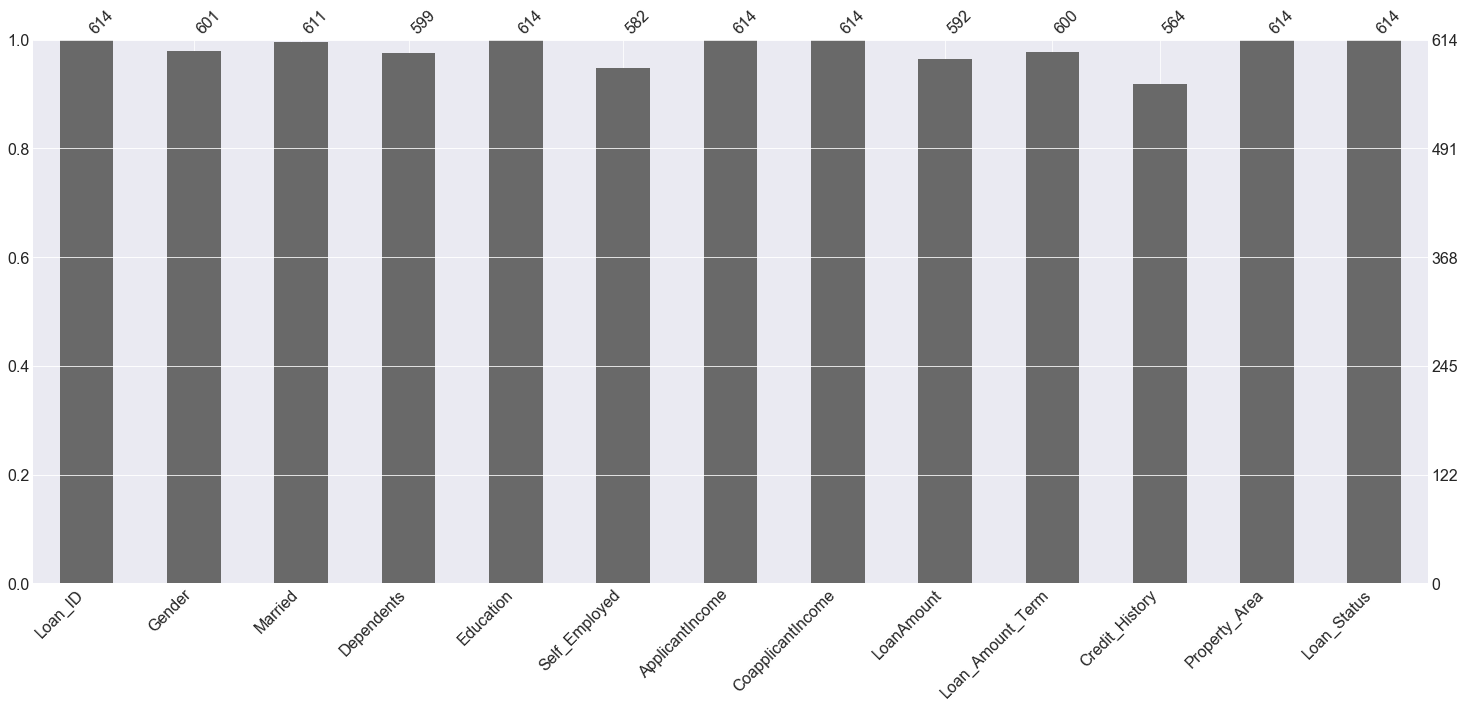

In [13]:
#Visualizing how complete the dataset is
missingno.bar(data)

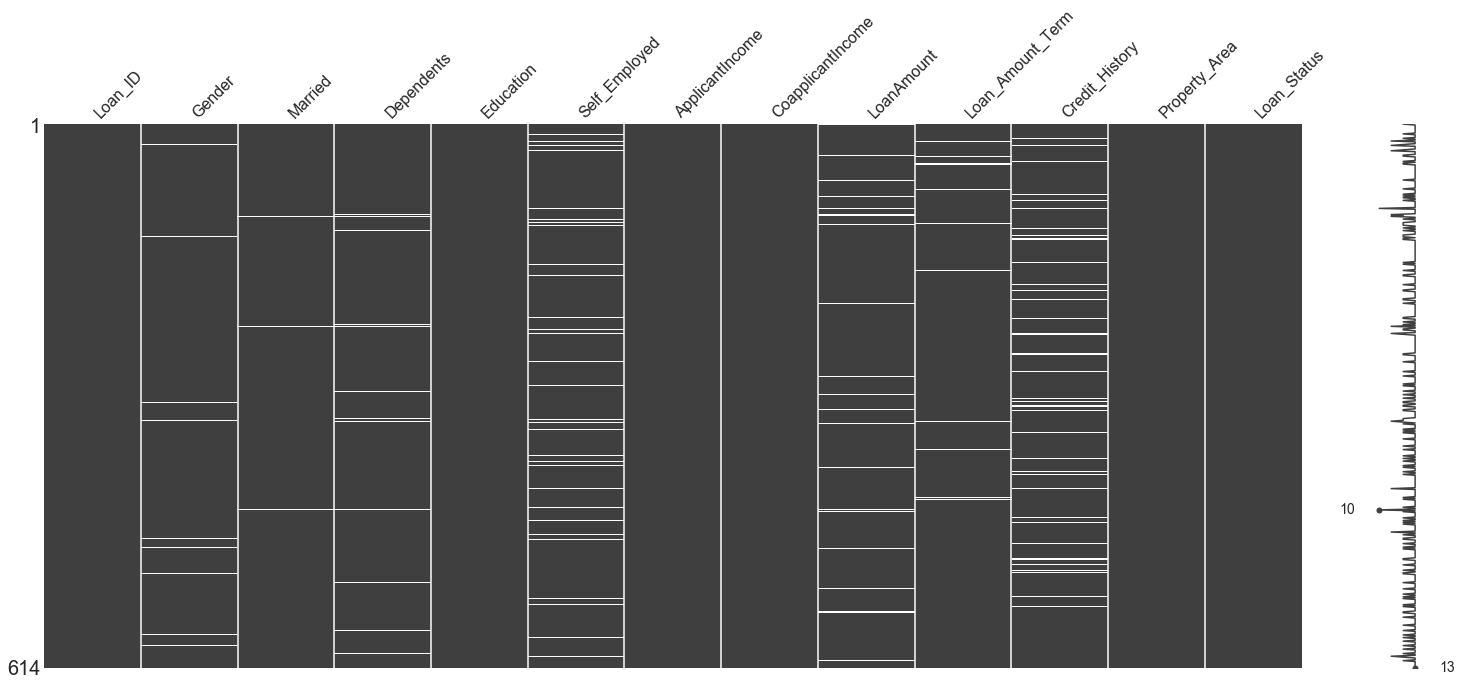

In [14]:
#Visualizing the location of missing values in the dataset
missingno.matrix(data)

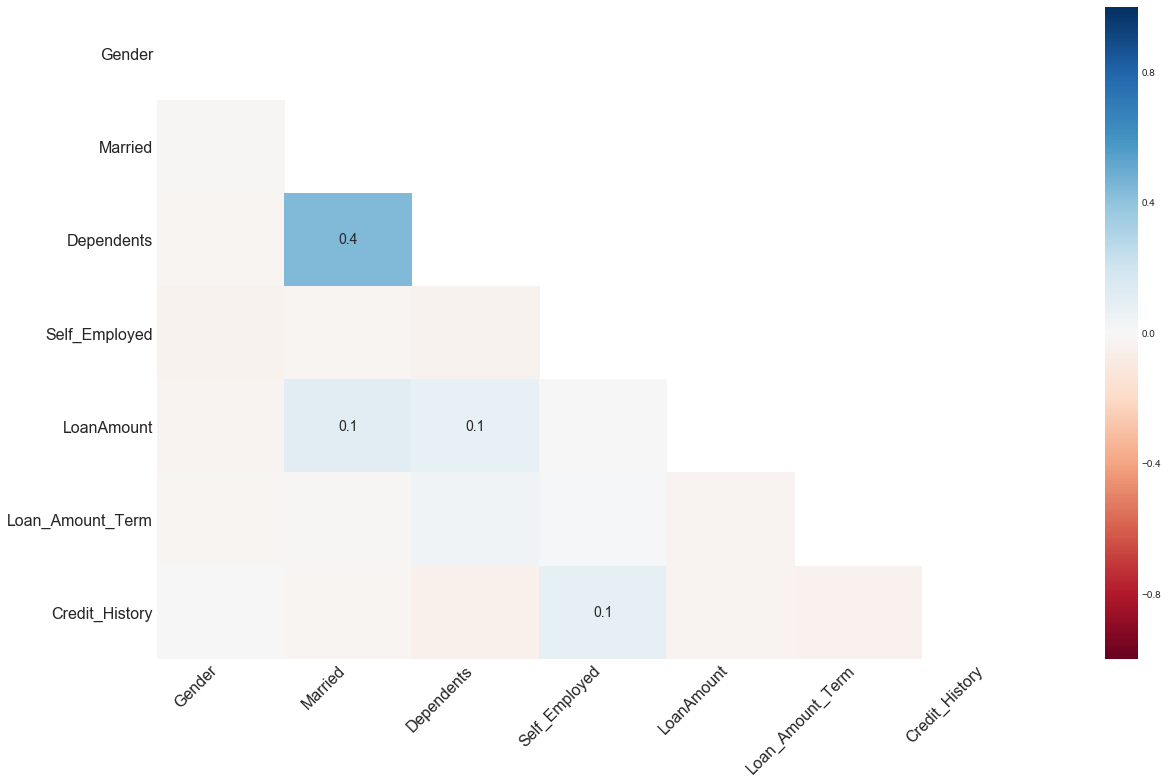

In [15]:
#Visualizing the correlation between numerical columns of this dataset
missingno.heatmap(data)

**Insights from EDA**

There are 614 observations and 13 columns in the dataset provided. The categorical columns present are 8 while 5 are numerical. Seven out of the total number of columns present in the dataset have missing values with Credit History column having the highest missing value of 0.08%.

All observations recorded are unique and the categorical columns consist of 2 to 4 unique categories. 

Credit History and Loan_Amount_Term Columns are  categorcal column and would be changed from float to object.

There are outliers in the Applicant income and Applicant. The correlation between the missing values are not high, the highest which is 0.4 is between the married and dependent variables. 

# Data Cleaning

In [16]:
#To get all the columns in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
#Let's try to fix the missing values
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
#Since there are more male customers, we would replace the missing values
#with the mode
data['Gender']=data['Gender'].fillna('Male')

In [19]:
#To check if the changeshas been made
data['Gender'].isnull().sum()

0

In [20]:
# categorical columns with missing values
missing_cat=data[['Married','Dependents','Self_Employed']]

#To check the vale counts for the missing columns
for col in missing_cat:
    print(missing_cat[col].value_counts())
    print('\n')

Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64




In [21]:
# Filling the missing categorical columns with the mode
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [22]:
#To check if the changes has been made
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#For the Loan amount, since there is a range of numbers we would
#fill in tne missing values with the mean of the column 
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())


In [24]:
# Credit history
print('The Value counts of the column:')
print(data['Credit_History'].value_counts())

print('\n')

#Convert the datatype
data['Credit_History']=data['Credit_History'].astype('O')
print("The data type of the column is now:", data['Credit_History'].dtype)

#Filling in the missing values with the highest occuring frequency
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

print('\n')
#Checking if the change has been made
print('The missing values in this column are:', data['Credit_History'].isnull().sum())

The Value counts of the column:
1.0    475
0.0     89
Name: Credit_History, dtype: int64


The data type of the column is now: object


The missing values in this column are: 0


In [25]:
#Loan amount term
print('The Value counts of the column:')
print(data['Loan_Amount_Term'].value_counts())

print('\n')


#We would be filling the missing values with the highest occuring number since 
#this seems to be a categrical column

data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

print('\n')
#Checking if the change has been made
print('The missing values in this column are:', data['Loan_Amount_Term'].isnull().sum())

The Value counts of the column:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64




The missing values in this column are: 0


In [26]:
#let's check if there are missing values in our dataset now
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
#converting the float columns to integer
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int')
data['LoanAmount']=data['LoanAmount'].astype('int')

** Insights from Data cleaning**

The categorical columns with missing values present in the dataset were filled with the mode of each column i.e the category with the highest frequency.
The Loan amount term and credit history columns were converted to categorical columns and the missing values were filled with the mode.

The numerical column with missing values was filled with the mean of the column.

The columns with the outliers would be left just as they are. This is becase it is pretty normal for some applicant to earn more than the others.

All numerical columns were converted from float to integer type.

# Data Visualization

In [28]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360.0,1.0,Urban,Y


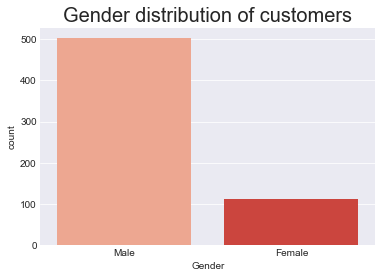

In [29]:
# Gender
sns.countplot( x='Gender', data=data, palette='Reds')
plt.title('Gender distribution of customers', size=20)
plt.show()

In [30]:
#automating the process for other categorical variables

def countplot(col):
    sns.countplot(x=col, data=data)
    plt.title(f'{col} distribution of customers', size=20)
    plt.show()

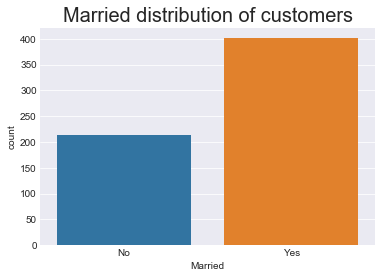

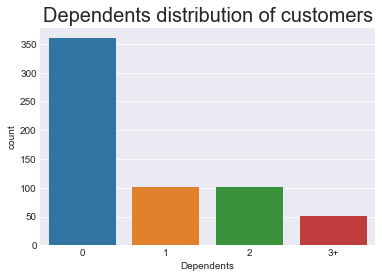

In [31]:
#Married and Dependents
countplot('Married')
countplot('Dependents')

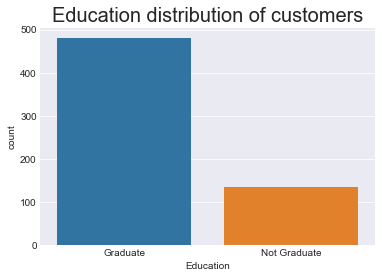

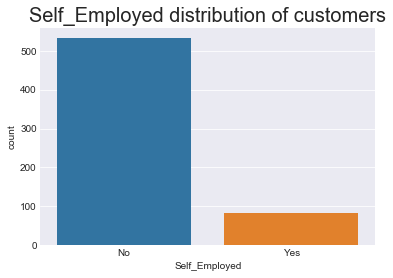

In [32]:
#Education and Self_Employed
countplot('Education')
countplot('Self_Employed')

**Loan_Amount_Term, Credit_History,Property_Area and Loan_Status**

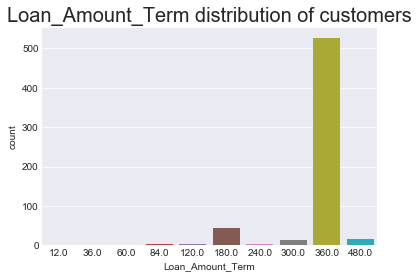

In [33]:
countplot('Loan_Amount_Term')

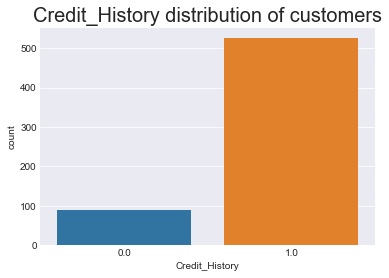

In [34]:
countplot('Credit_History')

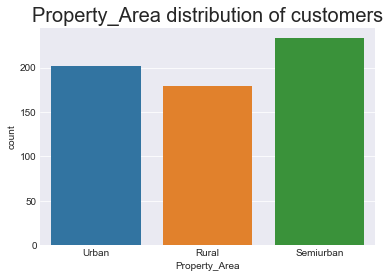

In [35]:
countplot('Property_Area')

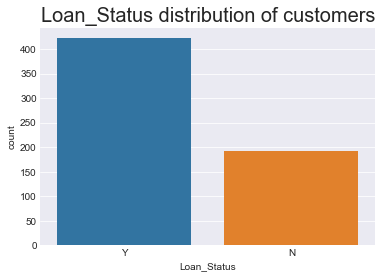

In [36]:
countplot('Loan_Status')

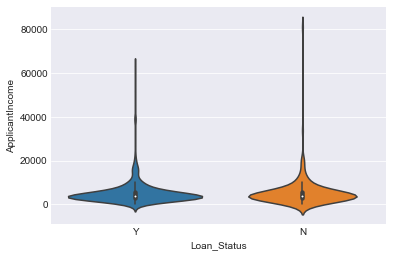

In [37]:
#To check the if applicant's salary has anything to do with loan approval
sns.violinplot(x='Loan_Status',y='ApplicantIncome',data=data)
plt.show()

**Aplicant's salary, Loan amount an Approval**

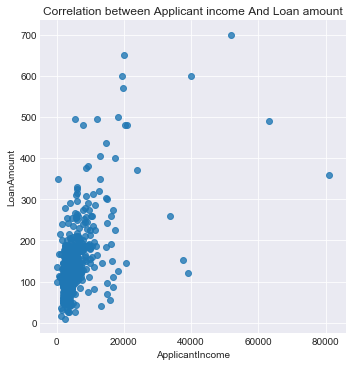

In [38]:
#To check the correlation between applicant's salary and loan amount
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=data, fit_reg=False)
plt.title('Correlation between Applicant income And Loan amount')
plt.show()

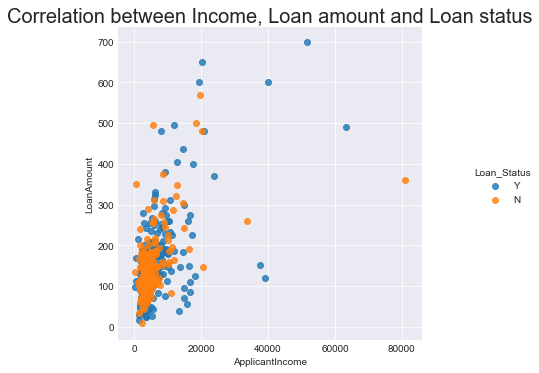

In [39]:
# To see the correlation between income, loan amount and loan status
sns.lmplot(x='ApplicantIncome', y='LoanAmount',hue='Loan_Status', data=data, fit_reg=False)
plt.title('Correlation between Income, Loan amount and Loan status', size= 20)
plt.show()

**Education, income and loan amount**

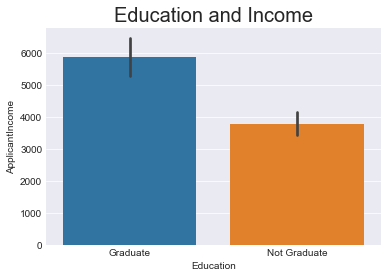

In [40]:
sns.barplot(x='Education', y='ApplicantIncome', data=data)
plt.title('Education and Income', size= 20)
plt.show()

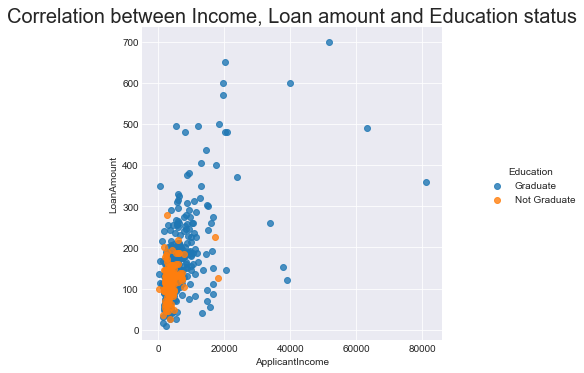

In [41]:
# To see the correlation between income, loan amount and education status
sns.lmplot(x='ApplicantIncome', y='LoanAmount',hue='Education', data=data, fit_reg=False)
plt.title('Correlation between Income, Loan amount and Education status', size= 20)
plt.show()

** Applicant and Coapplicant income**

In [39]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

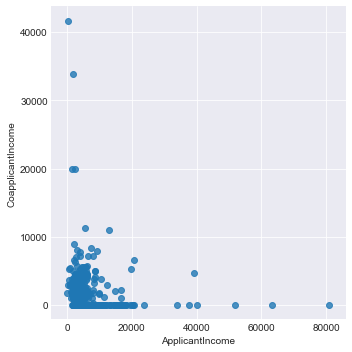

In [40]:
# To see the correlation between applicant income and coapplicant income
sns.lmplot(x='ApplicantIncome', y='CoapplicantIncome', data=data, fit_reg=False)

**Income**

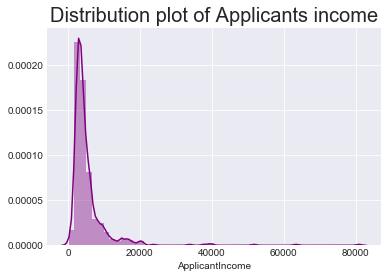

In [41]:
#Let us see the distribution of income of our customers
sns.distplot(data['ApplicantIncome'], color='purple')
plt.title('Distribution plot of Applicants income',size= 20)
plt.show()

** Heat Map**

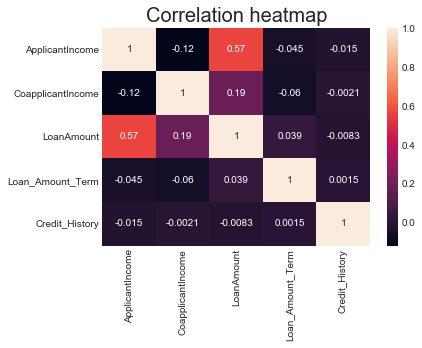

In [42]:
#Correlation
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation heatmap', size=20)
plt.show()

**Insights from Visualization**

From our chart, we can conclude that mostly males apply for home loans.

About 75% of applicants are married.

A large number of applicants have no dependents, while some have up to three and abve.

Most of the applicants are graduates.

Loan applicants are mostly not self employed.

Loan amount term ranges between 12 months and 480 months with majority of applicants having loan term of 360 months.

Most loan applicant have a credit history with the company.

A large number of loan applicant have properties in semiurban areas and the least in rural areas.

Over 70%  of loan applications are approved.

Majority of loan applicants that got an approval earn between 0-20,000, while there are exceptions of people earning over 60,000 and got an approval.Some applicants earning as high as 80,000 still got their loan application rejected.

Applicants earning below 20,000 mostly apply for loans between 0 to 300. There are cases of applicants earnng less than 20,000 and applying for loans over 600.Applicants earning between 80000 and above  tend to apply for loans lesser than 400. Applicants earning between 20000 and 60000 apply for loans as low as 100 and sometimes as high as 700.

A large Number of applicants earning below 20000 have their applications approved while majority of rejection occur in this category too.There is a special case of applicant earning above 80k and still not getting approval despite applying for an average loan amount.People earning between 40k nd 60k have the probability of getting an approval if they apply for loans as high as 600 and above.

Majority of applicant and co applicant earn below 20,000.There are appliats that earn no income or sightly above zero and have co applicants earning 20k and above while some applicants earn above 20k while coapplicants earn zero.

Majority of applicants earn between 0-20k, while there are some cases of applicants earning as high as 80k.



# Data Preprocessing

Let's split the dataset into categorical and numerical columns so as to enable us carry out preprocessing for building our machine learning models.

In [42]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('O')
data['Credit_History']=data['Credit_History'].astype('O')

In [43]:
#Categorical columns
cat=data.select_dtypes('O')

In [44]:
#first five rows
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,360,1,Urban,Y


In [45]:
#Since we wont be needing the ids, we would drop the columns.
cat.drop('Loan_ID', inplace=True, axis=1)

In [46]:
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,360,1,Urban,Y
4,Male,No,0,Graduate,No,360,1,Urban,Y


In [47]:
# Creating a dataframe for our numerical columns
num=data.select_dtypes(include=np.number)

In [48]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0,146
1,4583,1508,128
2,3000,0,66
3,2583,2358,120
4,6000,0,141


**Encoding**

We would use the one hot encoding so that the categories are not given hierarchies. 

In [49]:
#Creating a new dataframe for encoded features
encoded = pd.get_dummies(cat,drop_first=True)

In [50]:
# first five rows
encoded.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [51]:
#Merging the numerical and encoded to a dataframe
train=pd.merge(num,encoded, left_index=True, right_index=True)

In [52]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0,146,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,4583,1508,128,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3000,0,66,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
3,2583,2358,120,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
4,6000,0,141,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1


**Label encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
for col in cat:
    cat[col]=le.fit_transform(cat[col])

In [55]:
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8,1,2,1
1,1,1,1,0,0,8,1,0,0
2,1,1,0,0,1,8,1,2,1
3,1,1,0,1,0,8,1,2,1
4,1,0,0,0,0,8,1,2,1


In [56]:
#Merging the numerical and encoded to a dataframe
new_train=pd.merge(num,cat, left_index=True, right_index=True)

In [57]:
new_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,5849,0,146,1,0,0,0,0,8,1,2,1
1,4583,1508,128,1,1,1,0,0,8,1,0,0
2,3000,0,66,1,1,0,0,1,8,1,2,1
3,2583,2358,120,1,1,0,1,0,8,1,2,1
4,6000,0,141,1,0,0,0,0,8,1,2,1


**Splitting the dataset**

In [58]:
#Split into X and y
X = new_train.drop('Loan_Status', axis=1)
y = new_train.Loan_Status

In [59]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,5849,0,146,1,0,0,0,0,8,1,2
1,4583,1508,128,1,1,1,0,0,8,1,0
2,3000,0,66,1,1,0,0,1,8,1,2
3,2583,2358,120,1,1,0,1,0,8,1,2
4,6000,0,141,1,0,0,0,0,8,1,2


In [60]:
train.shape

(614, 23)

**Feature Selection**

We are using the SelectKBest in the sklearn library-to select k best features in our dataset.chi2-Internally this class is going to check that whether p-value is less than 0.05 or not based on that,it will actually order all the features

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [62]:
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_features.fit(X,y)

In [63]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([9.39049635e+01, 1.13421846e+04, 3.90626151e+01, 3.62343084e-02,
       1.78242499e+00, 8.59527587e-02, 3.54050246e+00, 7.28480330e-03,
       3.17201503e-03, 2.60058772e+01, 3.77837464e-01])

In [64]:
#Creating a dataframe for the scores
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,93.904964
1,11342.184564
2,39.062615
3,0.036234
4,1.782425
5,0.085953
6,3.540502
7,0.007285
8,0.003172
9,26.005877


In [65]:
#Creating a dataframe for the columns in the x dataframe
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Gender
4,Married
5,Dependents
6,Education
7,Self_Employed
8,Loan_Amount_Term
9,Credit_History


In [66]:
#Joining the two datafrae
features_rank=pd.concat([dfcolumns,datascores],axis=1)
features_rank

,0,Score
0,ApplicantIncome,93.904964
1,CoapplicantIncome,11342.184564
2,LoanAmount,39.062615
3,Gender,0.036234
4,Married,1.782425
5,Dependents,0.085953
6,Education,3.540502
7,Self_Employed,0.007285
8,Loan_Amount_Term,0.003172
9,Credit_History,26.005877


In [67]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,ApplicantIncome,93.904964
1,CoapplicantIncome,11342.184564
2,LoanAmount,39.062615
3,Gender,0.036234
4,Married,1.782425
5,Dependents,0.085953
6,Education,3.540502
7,Self_Employed,0.007285
8,Loan_Amount_Term,0.003172
9,Credit_History,26.005877


In [68]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
1,CoapplicantIncome,11342.184564
0,ApplicantIncome,93.904964
2,LoanAmount,39.062615
9,Credit_History,26.005877
6,Education,3.540502
4,Married,1.782425
10,Property_Area,0.377837
5,Dependents,0.085953
3,Gender,0.036234
7,Self_Employed,0.007285


In [69]:
# Creating a dataframe for the selected column
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [70]:
#Creating a new x variable
X_new=new_train[selected_columns]

In [71]:
X_new.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Education,Married,Property_Area,Dependents,Gender,Self_Employed
0,0,5849,146,1,0,0,2,0,1,0
1,1508,4583,128,1,0,1,0,1,1,0
2,0,3000,66,1,0,1,2,0,1,1
3,2358,2583,120,1,1,1,2,0,1,0
4,0,6000,141,1,0,0,2,0,1,0


**Training and Testing**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=0)

# Machine Learning Model

In [74]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42)

In [75]:
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

[17:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Faith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log=LogisticRegression()
log.fit(X_train,y_train)
log_pred=log.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [79]:
confusion = confusion_matrix(y_test,log_pred )
print('Confusion Matrix:')
print(confusion)

print ('\n')

accuracy=accuracy_score(y_test,log_pred)
print('Accuracy score:')
print(accuracy)

Confusion Matrix:
[[ 22  29]
 [  2 132]]


Accuracy score:
0.8324324324324325


The accuracy of our model is 83%. Let us perform hyperparameter tuning to better our model performance

**Hyper Parameter Optimization with respect to XGBoost**

In [80]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [83]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.9s finished


[17:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, mis...sample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.2, 0.25], 'max_depth': [5, 8, 10, 12], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.4], 'colsample_bytree': [0.3, 0.4, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [84]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=12,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [85]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 7}

In [86]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=7, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [87]:
xgb.fit(X_train,y_train)

[17:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [88]:
y_pred=xgb.predict(X_test)

C:\Users\Faith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

print ('\n')

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score:')
print(accuracy)

Confusion Matrix:
[[ 22  29]
 [  4 130]]


Accuracy score:
0.8216216216216217


The accuracy of our model increased from 81 to 82%.

**Pickling**

In [97]:
import pickle

In [98]:
#Dumping the model 
filename='loan_prediction_model.pkl'
pickle.dump(xgb, open(filename,'wb'))

In [99]:
#Loading and testing model
model=pickle.load(open(filename,'rb'))

In [142]:
#Dumping the model 
filename='loan_model.pkl'
pickle.dump(log, open(filename,'wb'))

In [143]:
#Loading and testing model
log_model=pickle.load(open(filename,'rb'))

In [144]:
log_model.predict([[3449,14,2609,165,1,1,9,0,0,1]])

array([1], dtype=int64)

In [135]:
X_test['Loan_Amount_Term'].unique()

array([16, 28, 24,  9, 12, 15, 30, 34, 14, 32, 18,  4, 20, 29, 11, 22, 37,
        0,  3,  5,  7, 27, 35,  2], dtype=int64)

In [123]:
model.predict(df)

C:\Users\Faith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1], dtype=int64)

In [125]:
user_input=[[3449,14,2609,165.0,1,1,9,0,0,1]]
df=pd.DataFrame(user_input, columns =['CoapplicantIncome', 'Credit_History', 'ApplicantIncome', 'LoanAmount',
       'Education', 'Married', 'Loan_Amount_Term', 'Property_Area',
       'Dependents', 'Gender'])

In [127]:
model.predict(df)

C:\Users\Faith\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0], dtype=int64)

# Customer Segmentation

To group our customers into various segments,let"s find the value of k i.e the optimal value of clusters

**Standardization**

In [90]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [91]:
mms.fit(new_train)
standard=mms.transform(new_train)

**Dimensionality Reduction**

In [92]:
from sklearn.decomposition import PCA

In [93]:
X_new.columns

Index(['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Education', 'Married', 'Property_Area', 'Dependents', 'Gender',
       'Self_Employed'],
      dtype='object')

In [94]:
#Using the features from our Kbest feature selection
pca_data=X_new[['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Education', 'Married', 'Property_Area', 'Dependents', 'Gender',
       'Self_Employed']]

In [95]:
pca_data.head()

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Education,Married,Property_Area,Dependents,Gender,Self_Employed
0,0,5849,146,1,0,0,2,0,1,0
1,1508,4583,128,1,0,1,0,1,1,0
2,0,3000,66,1,0,1,2,0,1,1
3,2358,2583,120,1,1,1,2,0,1,0
4,0,6000,141,1,0,0,2,0,1,0


In [96]:
pca=PCA(n_components=2)
pca.fit(pca_data)
new_data=pca.transform(pca_data)

In [97]:
#Lets check how good our transformation was
pca.explained_variance_ratio_

array([0.81657378, 0.18333157])

In [98]:
pca.components_

array([[-7.19017559e-02,  9.97382445e-01,  7.64167033e-03,
        -1.08850779e-06, -9.31802460e-06,  3.80327984e-06,
        -1.26350231e-06,  1.92347744e-05,  3.51658170e-06,
         7.07161901e-06],
       [ 9.97384317e-01,  7.18408789e-02,  7.96313840e-03,
         1.01867329e-06, -1.19737721e-05,  1.38414428e-05,
         2.48124497e-06,  1.68963534e-05,  1.23057668e-05,
         3.60327014e-07]])

In [99]:
#converting the components to a df
df=pd.DataFrame(new_data, columns=['PC1','PC2'])

In [100]:
df.head()

,PC1,PC2
0,560.941748,-1584.998781
1,-810.309800,-172.037094
2,-2281.212161,-1790.310482
3,-2866.252347,531.994089
4,711.508289,-1574.190624


In [102]:
from sklearn.cluster import KMeans 

In [103]:
#Silhoutte score

from sklearn.metrics import silhouette_score
range=[2,3,4,5,6,7,8,9,10]
for i in range:
    km=KMeans(n_clusters=i)
    km.fit(new_data)
    labels=km.predict(new_data)
    print(i, silhouette_score(standard, labels))

2 0.08348919603772688
3 0.020578419292875964
4 0.01551641308415223
5 0.003084204678620049
6 -0.007905145941353236
7 -0.031717907851772684
8 -0.0431620085177096
9 -0.05237134904710641
10 -0.06921248711634995


We would segment our customers into 5 clusters, since 5 has the highest silhoutte score

In [104]:
km=KMeans(n_clusters=2)
km.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
km.cluster_centers_

array([[-5.08509255e+02, -2.57489770e+01],
       [ 4.40950169e+04,  2.23280415e+03]])

In [106]:
new_train['cluster']=km.labels_

In [107]:
new_train['cluster'].value_counts()

0    607
1      7
Name: cluster, dtype: int64

In [108]:
new_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,cluster
0,5849,0,146,1,0,0,0,0,8,1,2,1,0
1,4583,1508,128,1,1,1,0,0,8,1,0,0,0
2,3000,0,66,1,1,0,0,1,8,1,2,1,0
3,2583,2358,120,1,1,0,1,0,8,1,2,1,0
4,6000,0,141,1,0,0,0,0,8,1,2,1,0


In [109]:
#Let's build some visualizations but automate the process by writing a function
def scatter(col1,col2):
     sns.lmplot(x=col1, y=col2, data=new_train, hue='cluster', fit_reg=False)
     plt.title(f'Distribution of clusters based on {col1} and {col2}')
    

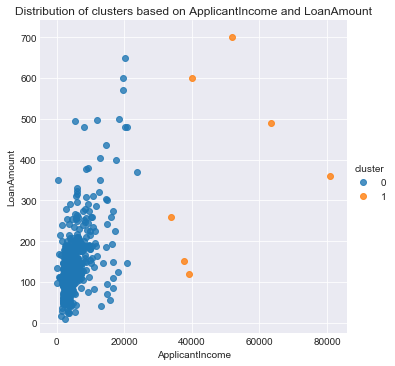

In [110]:
scatter('ApplicantIncome', 'LoanAmount')

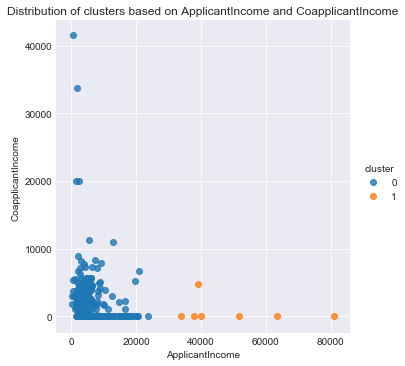

In [111]:
scatter('ApplicantIncome','CoapplicantIncome')

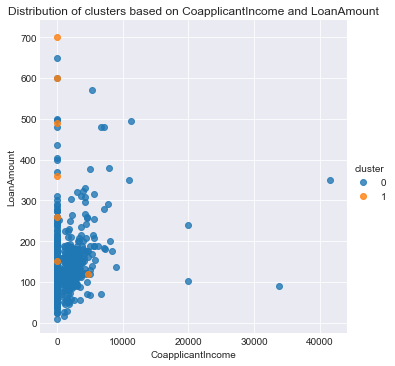

In [112]:
scatter('CoapplicantIncome','LoanAmount')

Our costumers have been segmented into 2 clusters.